In [1]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('incident_event_log.csv')
print('Shape of the data',df.shape)
df.head(5)

Shape of the data (119998, 36)


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   119998 non-null  object
 1   incident_state           119998 non-null  object
 2   active                   119998 non-null  bool  
 3   reassignment_count       119998 non-null  int64 
 4   reopen_count             119998 non-null  int64 
 5   sys_mod_count            119998 non-null  int64 
 6   made_sla                 119998 non-null  bool  
 7   caller_id                119998 non-null  object
 8   opened_by                119998 non-null  object
 9   opened_at                119998 non-null  object
 10  sys_created_by           119998 non-null  object
 11  sys_created_at           119998 non-null  object
 12  sys_updated_by           119998 non-null  object
 13  sys_updated_at           119998 non-null  object
 14  contact_type        

In [3]:
df.describe()

,reassignment_count,reopen_count,sys_mod_count
count,119998.000000,119998.000000,119998.000000
mean,1.151236,0.021025,5.199312
std,1.782823,0.196173,7.804628
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,2.000000,0.000000,7.000000
max,27.000000,8.000000,129.000000


In [4]:
import numpy as np
# replacing ? with Null values
df1=df.mask(df=='?',np.nan)

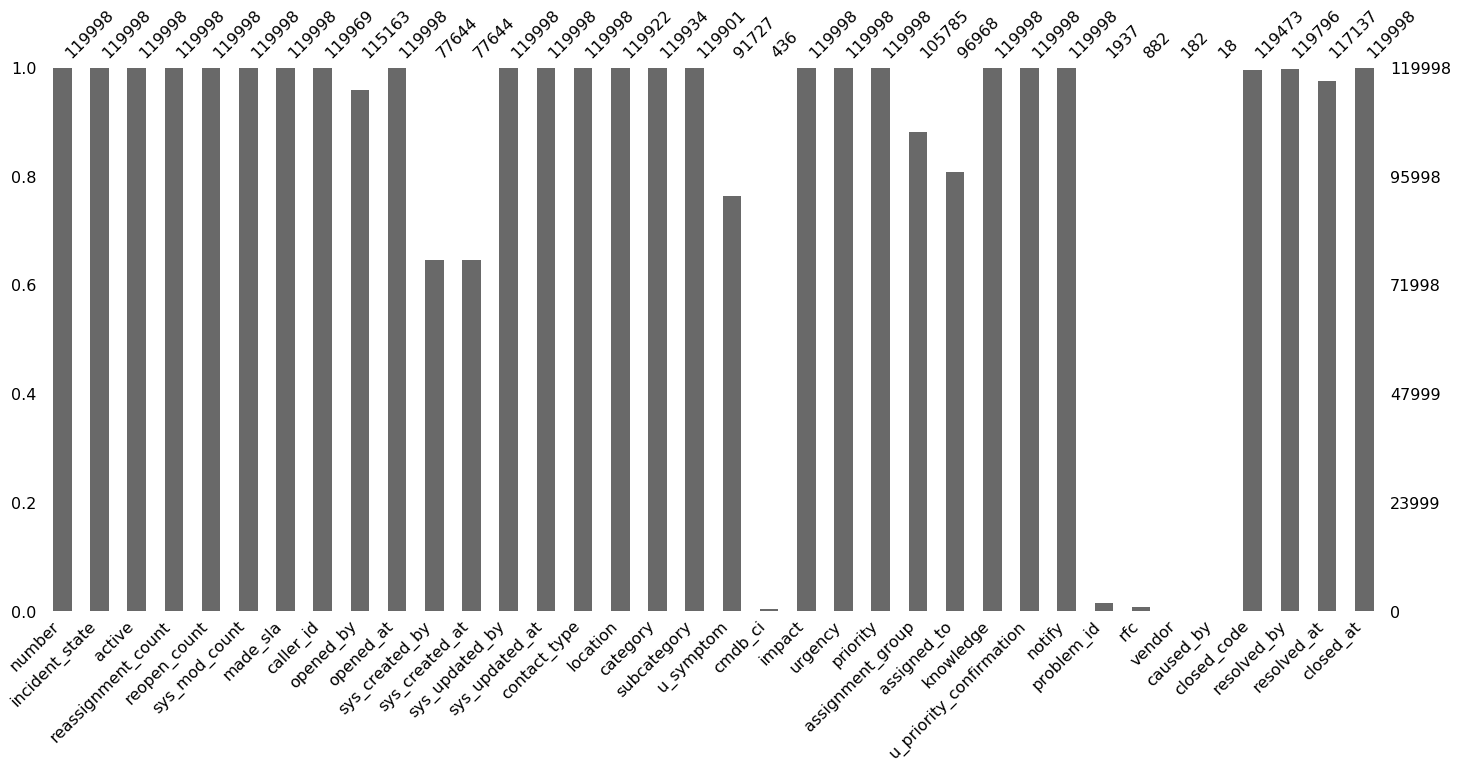

In [3]:
import missingno as ms
# Nice representation of missing values
ms.bar(df1)

In [5]:
# Percentage of missing features
for col in  df.columns:
    miss=(df[col]=='?').mean()
    if(miss!=0):
        print(col.ljust(20),round(miss,4))

caller_id            0.0002
opened_by            0.0403
sys_created_by       0.353
sys_created_at       0.353
location             0.0006
category             0.0005
subcategory          0.0008
u_symptom            0.2356
cmdb_ci              0.9964
assignment_group     0.1184
assigned_to          0.1919
problem_id           0.9839
rfc                  0.9926
vendor               0.9985
caused_by            0.9998
closed_code          0.0044
resolved_by          0.0017
resolved_at          0.0238


## Quick analysis: 
1. There are 3 numeric features , 4 boolean and 29 object features
2. Object features includes date features, these features need to be converted to date type 
3. Features problem_id, rfc, vendor, caused_by, cmdb_ci are having missing values more than 98%, sys_created_by and sys_created_at are having around 35% missing values, data is anonymized, probably that is the reason of missing values 



In [6]:
# Removing the features cmdb_ci, problem_id, rfc, vendor as there are more than 98% missing values in these features
df1.drop(['cmdb_ci','problem_id','rfc','vendor','caused_by'],axis=1,inplace=True)

## Posing the problem as a regression problem

In [7]:
# Changing dates features which are in string format to date-time objects
df1['opened_at']=pd.to_datetime(df1.opened_at,format='%d/%m/%Y %H:%M')
df1['sys_created_at']=pd.to_datetime(df1.sys_created_at,format='%d/%m/%Y %H:%M')
df1['sys_updated_at']=pd.to_datetime(df1.sys_updated_at,format='%d/%m/%Y %H:%M')
df1['resolved_at']=pd.to_datetime(df1.resolved_at,format='%d/%m/%Y %H:%M')
df1['closed_at']=pd.to_datetime(df1.closed_at,format='%d/%m/%Y %H:%M')
df1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00


In [8]:
# Creating target variables as difference between opened_at and resolved_at,closed_at in seconds
df1['resolved_time']=(df1.resolved_at-df1.opened_at).apply(lambda x: x.total_seconds())
df1['closed_time']=(df1.closed_at-df1.opened_at).apply(lambda x: x.total_seconds())
df1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,resolved_time,closed_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,36780.0,470640.0
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,36780.0,470640.0
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,36780.0,470640.0
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,NaN,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,36780.0,470640.0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,105120.0,537600.0


## Handling Null Values

Text(0.5, 1.0, 'Resolved Time vs Closed Time')

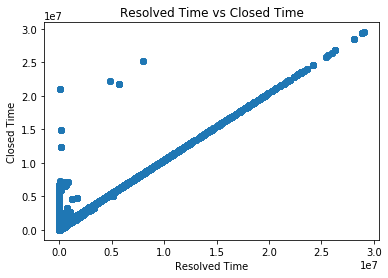

In [59]:
import matplotlib.pyplot as plt
plt.scatter(df1.resolved_time,df1.closed_time)
plt.xlabel('Resolved Time')
plt.ylabel('Closed Time')
plt.title('Resolved Time vs Closed Time')

In [9]:
#We have few missing values in our target variable resolved time
#Resolved time and closed time are highly correlated, so lets fill the missing values with help of closed time

differnce=df1.closed_time-df1.resolved_time
med_diff=np.median(differnce.dropna())
print('Median of the differences of closed and resolved time',med_diff)

#Replacing null values with the median of differneces between closed time and resolved time 
df1.resolved_time=df1.resolved_time.fillna(med_diff)


Median of the differences of closed and resolved time 434100.0


In [10]:
# We have missing values in the categorical features, lets make it as a seperate category as Missing
df1=df1.mask(df1.isnull(),'Missing')
df1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at,resolved_time,closed_time
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Missing,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,36780.0,470640.0
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Missing,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,36780.0,470640.0
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Missing,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,36780.0,470640.0
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,Missing,True,False,Do Not Notify,code 5,Resolved by 149,2016-02-29 11:29:00,2016-03-05 12:00:00,36780.0,470640.0
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,2016-03-01 09:52:00,2016-03-06 10:00:00,105120.0,537600.0


## Univariate Analysis

In [186]:
import seaborn as sns
import numpy as np
def plot_target(feature,resolve=False,df1=df1):
    ''' Plots subcategories vs target variables mean'''
    cats=df1[feature].unique()
    res=[]
    cls=[]
    for val in cats:
        res.append(df1.resolved_time[df1[feature]==val].mean())
        cls.append(df1.closed_time[df1[feature]==val].mean())
    
    #Subcategories occurences in the data
    
    if resolve==True:
        plt.subplots(1,1,figsize=(17,5))
        plt.ylabel('Time to resolve')
        plt.xlabel(feature+' subcategories')
        plt.title(feature+' vs resolved time')
        sns.barplot(cats,res)
        plt.show()
    
    plt.subplots(1,1,figsize=(17,5))
    plt.title(feature+' vs closed time')
    plt.ylabel('Time to close')
    plt.xlabel(feature+' subcategories')
    sns.barplot(cats,cls)
    plt.show()


1. As the number of sys_mods increase the time taken to close a ticket is increasing

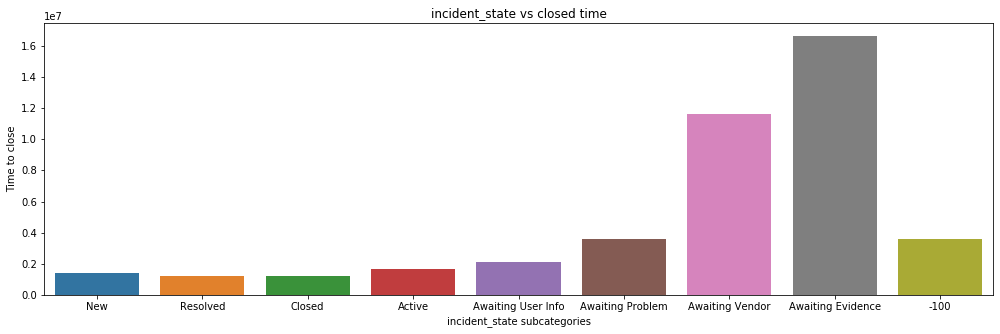

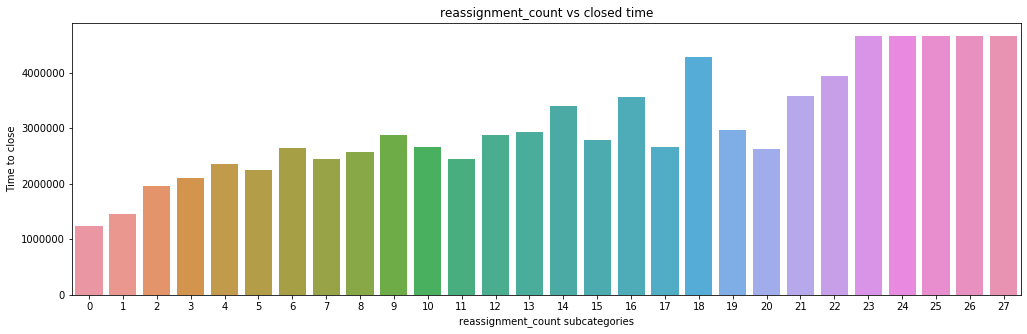

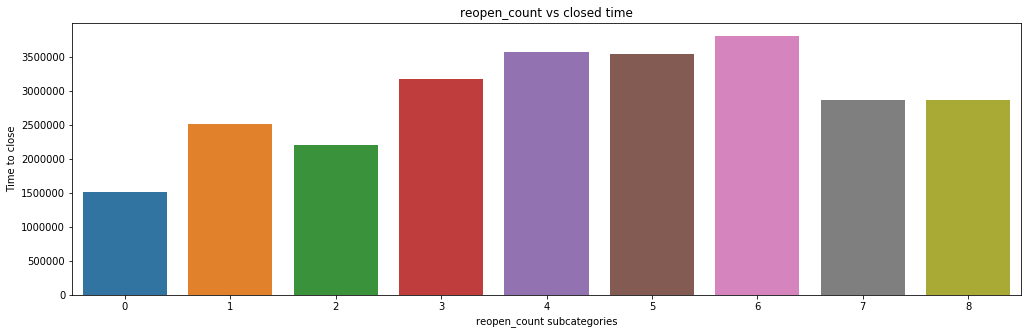

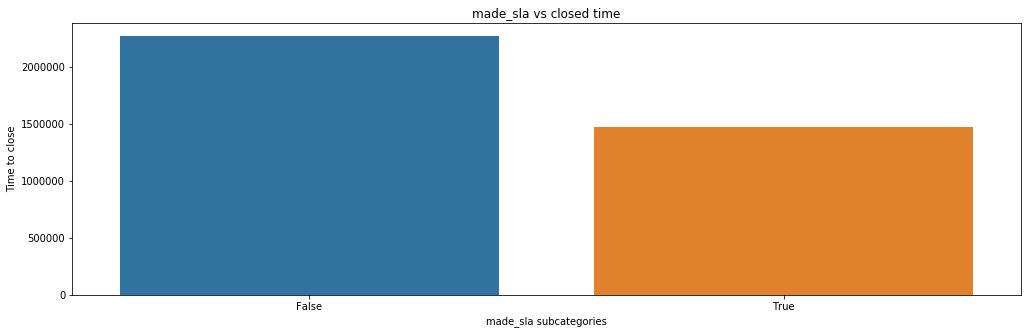

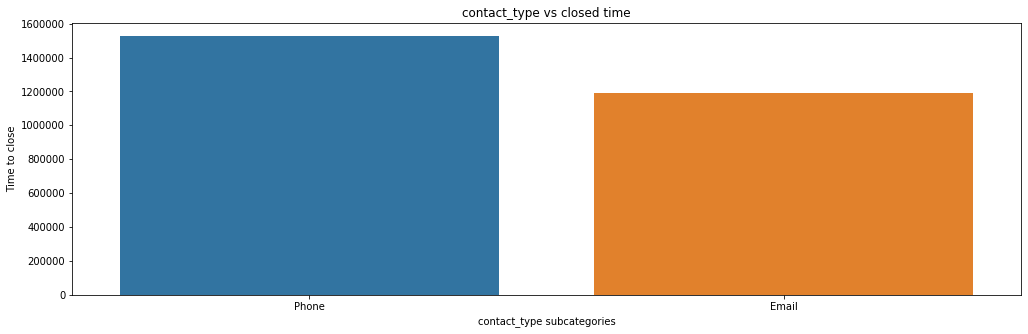

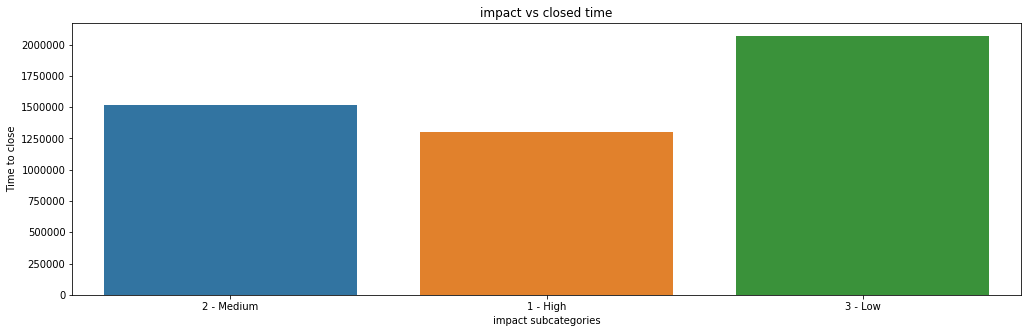

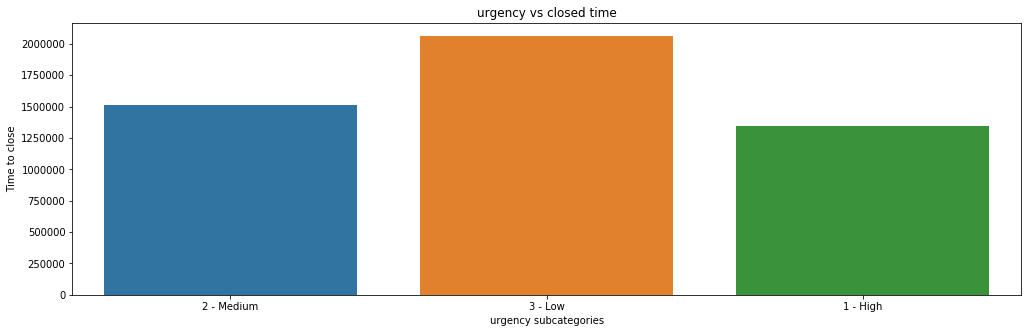

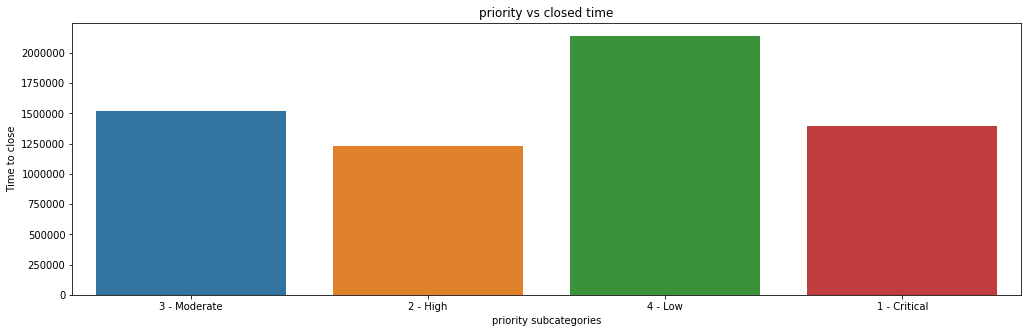

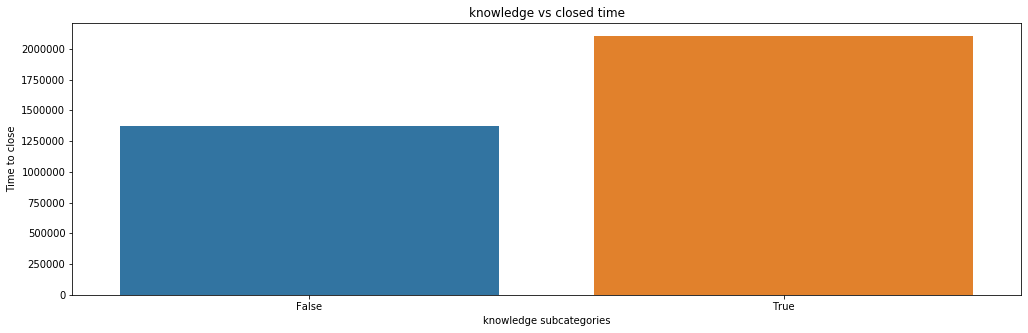

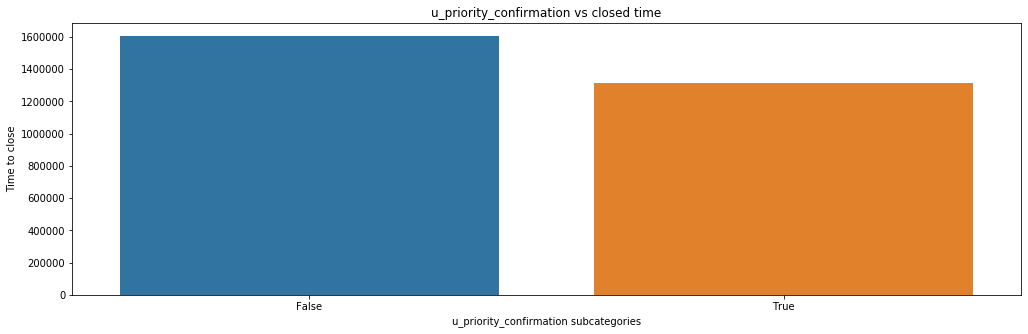

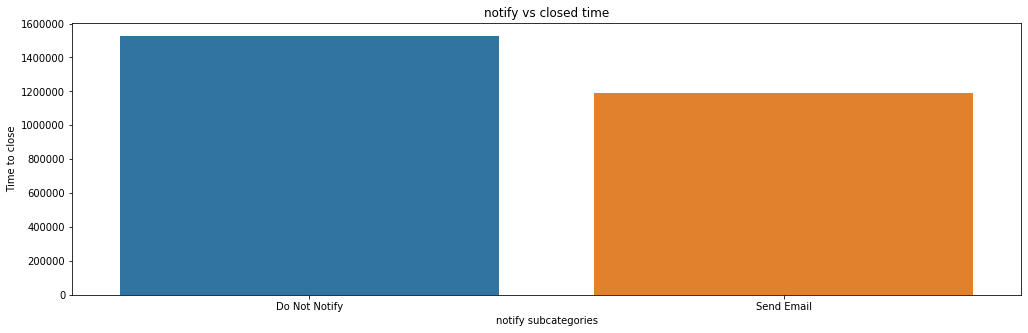

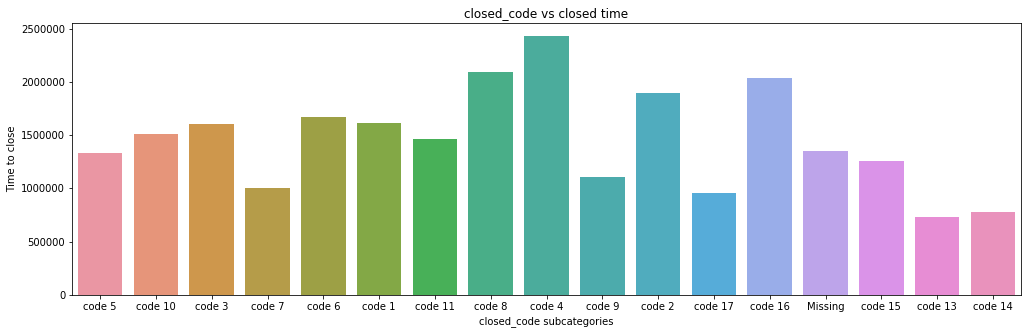

In [106]:
vals=['incident_state', 'reassignment_count', 'reopen_count',
        'made_sla', 'contact_type', 'impact', 'urgency', 'priority',       
       'knowledge', 'u_priority_confirmation', 'notify', 'closed_code',
       ]
for val in vals:
    plot_target(val)

1. Incident states Awaiting vendor and Awaiting Evidence are taking more time to resolve or close a ticket
2. As reassignment count increases closed time is also increases, there are few ups and downs
3. As reopen count increases closed time is also increases until 6 reopen counts, time decreases slightly after that
4. It is taking more time if there is no sla made for the ticket
5. If the incident is reported by phone, it is taking more time rather than email
6. Tickets which are having high impact are closed earlier than with low impact tickets
7. Tickets which are having high urgency are closed quickly than with low urgency
8. Tickets with low priority are taking more time than others 
9. If the tickets are closed with a knowledge document then they are taking more time.
10. If the priority label is double checked (u_priority_confirmation) they are taking lesser time
11. If there are notifications like sending emails for the incident, they are taking lesser time
12. Tickets closed with code4 are taking more time and tickets closed with code13 took less time 

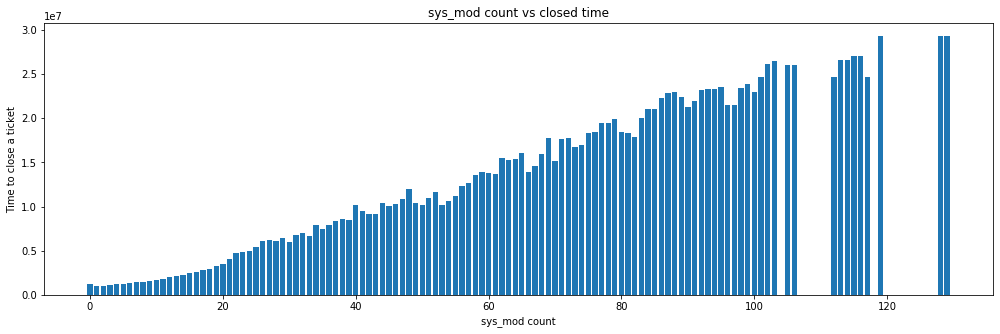

In [100]:
cats=df1['sys_mod_count'].unique()
res=[]
for val in cats:
    res.append(df1.closed_time[df1['sys_mod_count']==val].mean())

plt.subplots(1,1,figsize=(17,5))
plt.title('sys_mod count vs closed time')
plt.xlabel('sys_mod count')
plt.ylabel('Time to close a ticket')
plt.bar(cats,res)
plt.show()


1. As sys_mod count increases time to close a ticket is increasing

In [184]:
def mean_target(feature,full=False):
    ''' Retruns Top 5 and Least 5 subctegories which take max and min mean time to resolve/close'''
    cats=df1[feature].unique()
    res=[]
    cls=[]
    res_m=[]
    cls_m=[]
    
    #Getting v
    for val in cats:
        res.append(df1.resolved_time[df1[feature]==val].mean())
        cls.append(df1.closed_time[df1[feature]==val].mean())
    
    # Getting top 5 time and least 5 time taking categories
    res1=np.asarray(res)
    indices_=np.argsort(res1)
    indices=indices_[-5:]
    maxs=[cats[i] for i in indices]
    
    indices=indices_[:5]
    mins=[cats[i] for i in indices]
    
    resolve_cats=maxs+mins
    for val in resolve_cats:
        res_m.append((df1.resolved_time[df1[feature]==val].mean())/3600)
        
    if full==True:
        plt.subplots(1,1,figsize=(17,5))
        sns.barplot(resolve_cats,res_m)
        plt.ylabel('Time to close in hours')
        plt.title('Top 5  and Least 5 sub categories of feature '+feature.upper()+' for closing a ticket')
    
    plt.subplots(1,1,figsize=(17,5))
    plt.subplot(1,2,1)
    sns.barplot(resolve_cats[:5],res_m[:5])
    plt.ylabel('Time to resolve in hours')
    plt.title('Top 5 sub categories of feature '+feature.upper()+' for resolving a ticket')
    
    plt.subplot(1,2,2)
    sns.barplot(resolve_cats[5:],res_m[5:])
    plt.ylabel('Time to resolve in hours')
    plt.title('Least 5 sub categories of feature '+feature.upper()+' for resolving a ticket')
    plt.show()
    
    cls1=np.asarray(cls)
    indices_=np.argsort(cls1)
    indices=indices_[-5:]
    maxs=[cats[i] for i in indices]

    indices=indices_[:5]
    mins=[cats[i] for i in indices]

    close_cats=maxs+mins
    for val in resolve_cats:
        cls_m.append((df1.resolved_time[df1[feature]==val].mean())/3600)
       
    plt.subplots(1,1,figsize=(17,5))
    plt.subplot(1,2,1)
    sns.barplot(close_cats[:5],cls_m[:5])
    plt.ylabel('Time to close in hours')
    plt.title('Top 5 sub categories of feature '+feature.upper()+' for closing a ticket')
    
    plt.subplot(1,2,2)
    sns.barplot(close_cats[5:],cls_m[5:])
    plt.ylabel('Time to close in hours')
    plt.title('Least 5 sub categories of feature '+feature.upper()+' for closing a ticket')
    plt.show()
    

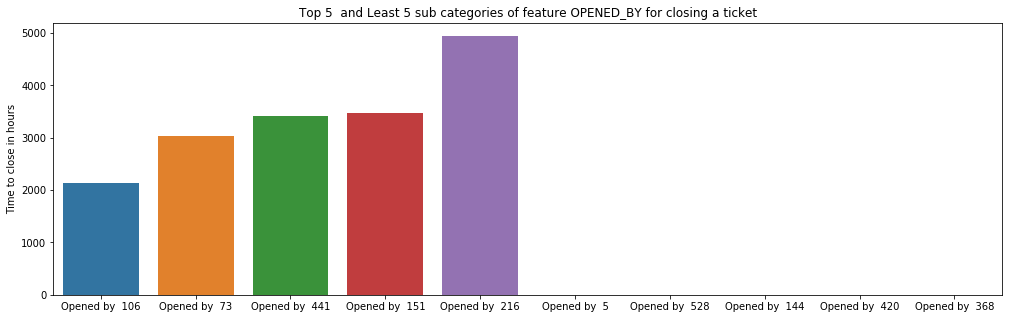

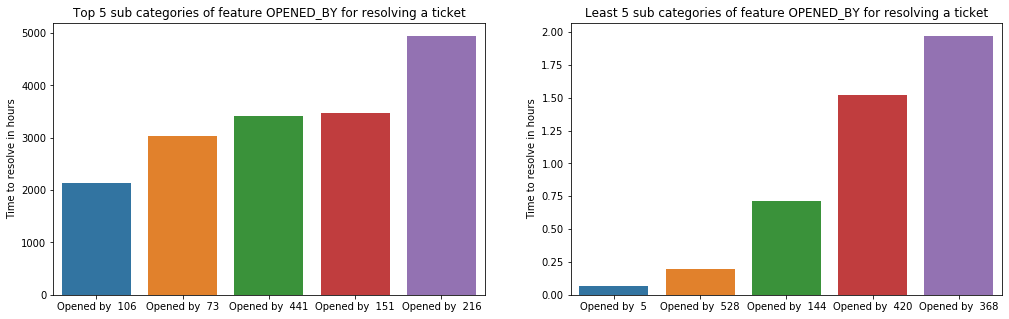

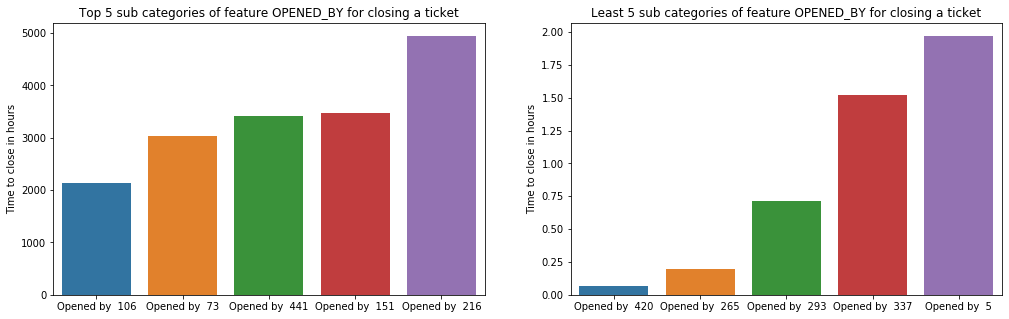

In [125]:
mean_target('opened_by',full=True)

1. Tickets which are opened by ID 216 are taking the more time to close or resolve a ticket
2. Tickets opened by 5 are taking lesser time to resolve and tickets opened by 420 are taking lesser time, subcategories are same for closing and resolving a ticket but they are different in closing a ticket.
3. Tickets opened by 5, 420 are resolved, closed in less than 10 mins.
3. There is a huge difference between the top 5 and least 5 subcategories, least features are almost negligible compared to top features
4. There is almost 3000 hours of difference between opened by 216 and opened by 106 which are top 1 and top 5 most time taking categories

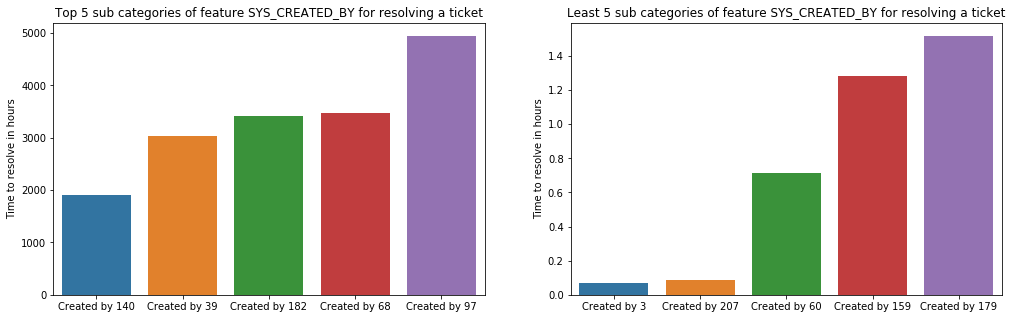

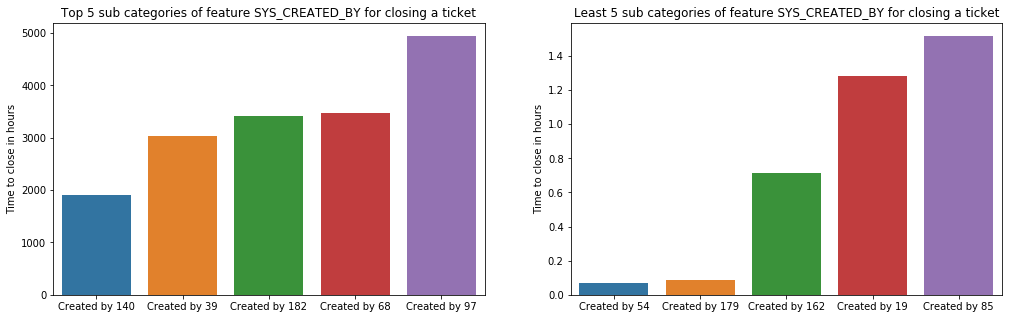

In [126]:
mean_target('sys_created_by')

1. Tickets which are created by Id 97 are taking more time to close or resolve a ticket
2. Created by Id 3 and 54 are taking the least time - less than 10 mins to resolve or close a ticket respectively 

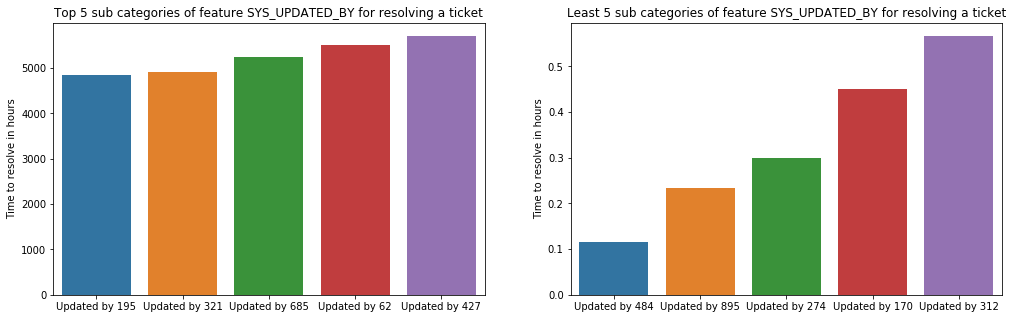

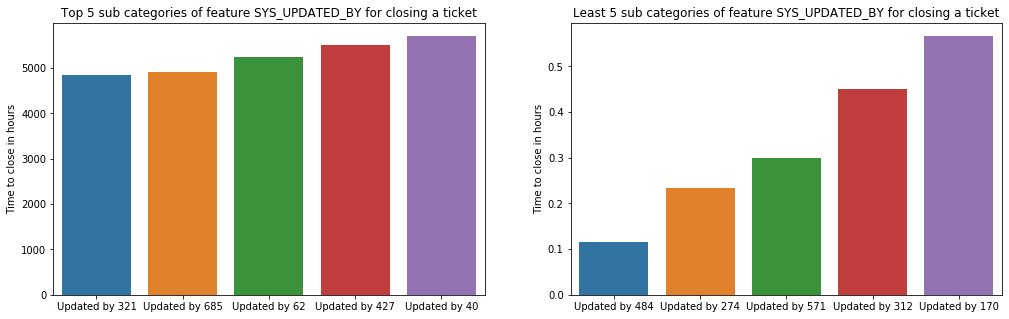

In [127]:
mean_target('sys_updated_by')

1. Tickets updated by 427, 40 are taking the most time to resolve and close a ticket respectively.
2. Tickets updated by 484 are taking the least time close or resolve a ticket.
3. There is about 500 hours of difference between top1 and top5 features
4. Least 5 features are closed with almost 35 mins.

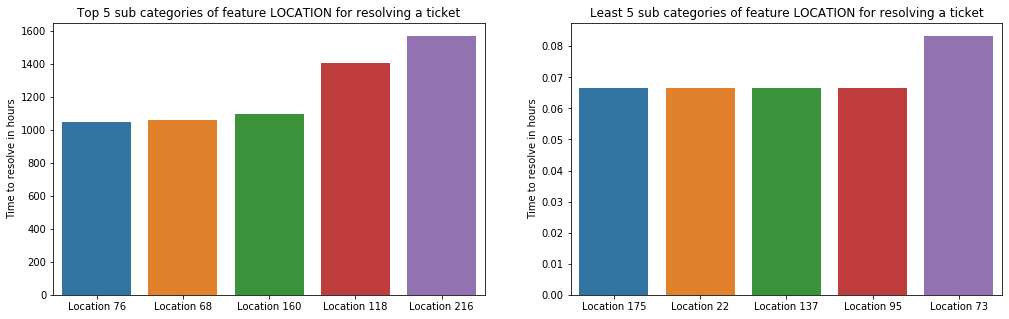

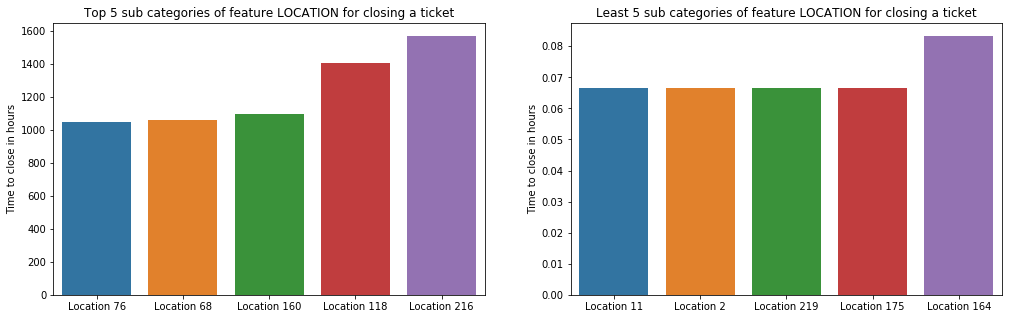

In [133]:
mean_target('location')

1. Tickets raised at location 216 took more to close
2. Tickets raised at location 175,11 took less time to resolve, close a ticket
3. It is notable that the least 5 features are resolved, closed with 5 mins 

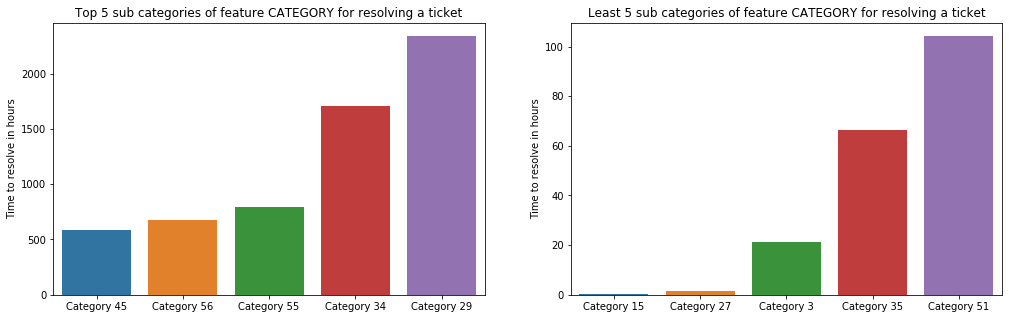

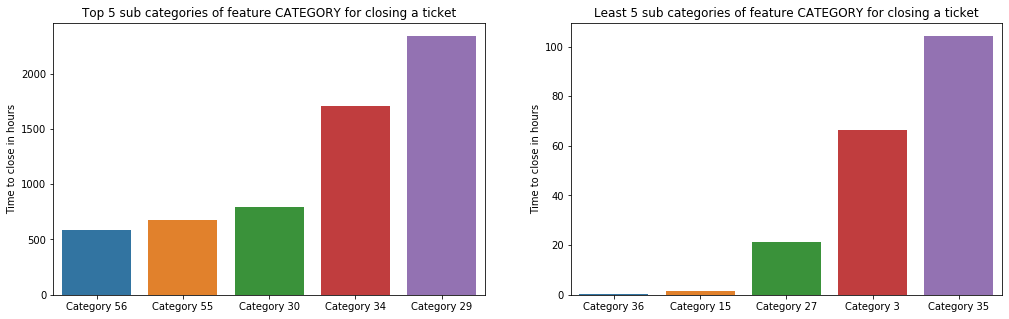

In [134]:
mean_target('category')

1. Tickets which comes under category 29 are taking highest time to resolve, close them
2. Least 5 categories are ranging from 0.1 to 100 hours, this is a huge variation

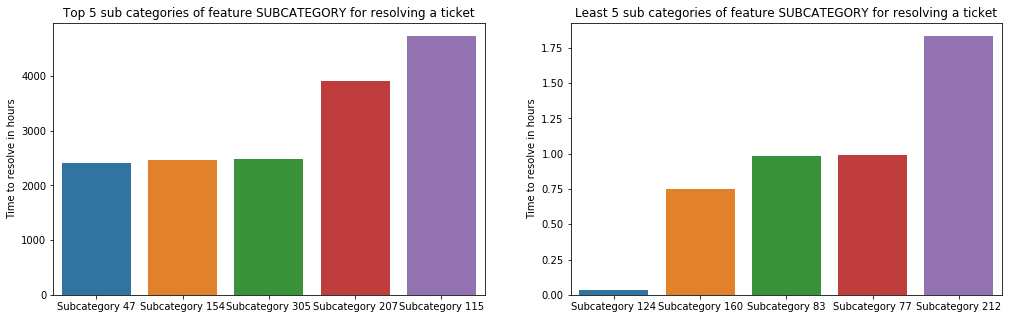

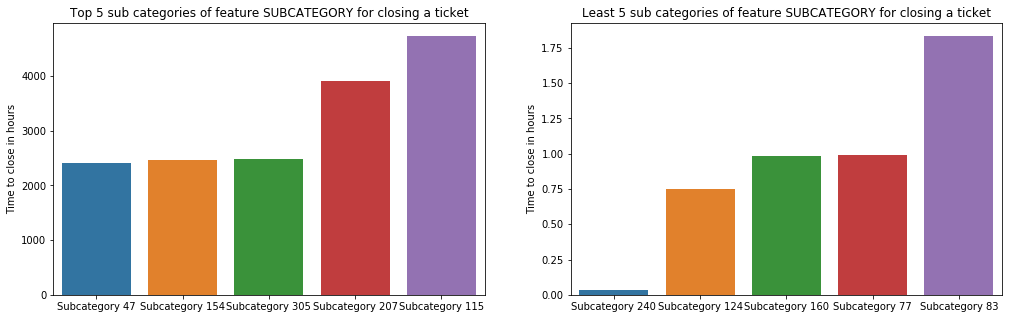

In [135]:
mean_target('subcategory')

1. Tickets raised under subcategory 115 took more time, 124, 240 took least time to resolve, close the tickets

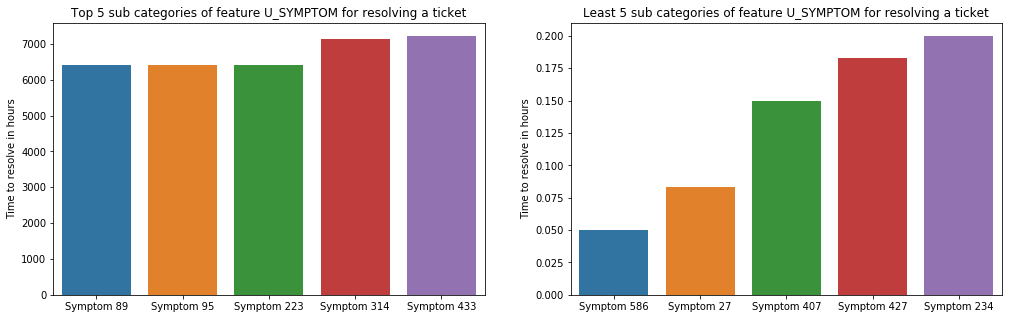

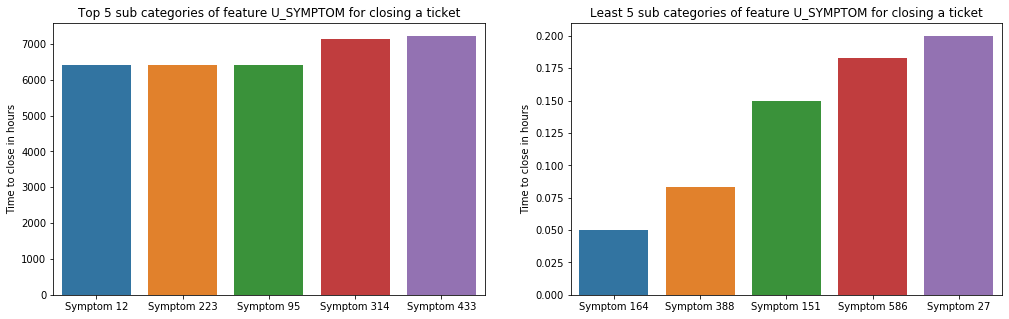

In [136]:
mean_target('u_symptom')

1. Top 5 features are having a difference of about 1k hours, least 5 features are closed, resolved with in 12 mins
2. Symptom 433 is taking more time and 586,164 are taking least time to resolve,close a ticket

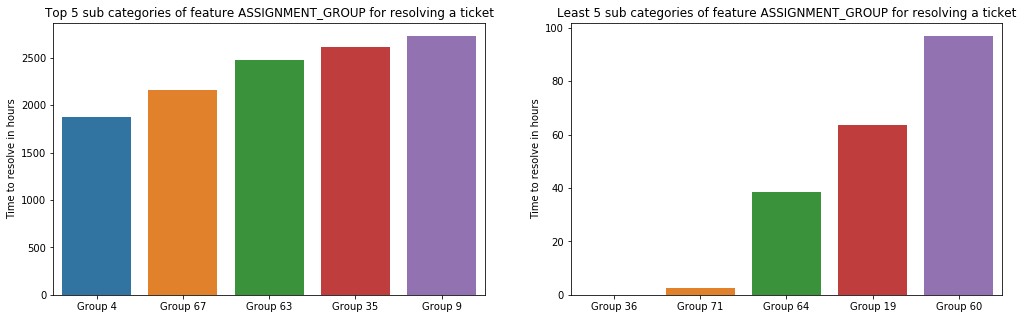

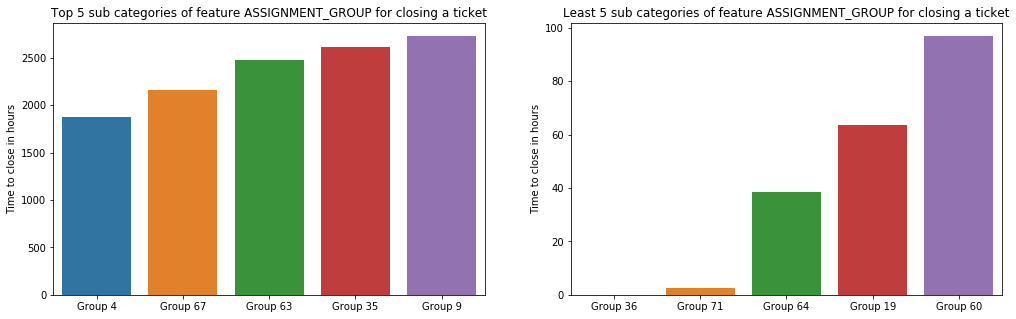

In [137]:
mean_target('assignment_group')

1. Top 5 and least 5 feature to resolve and close a ticket are same groups
2. Group 9 taking the most time and group 36 to take least time to resolve or close a ticket
3. Least 5 features range from about 0.1 to 100 hours

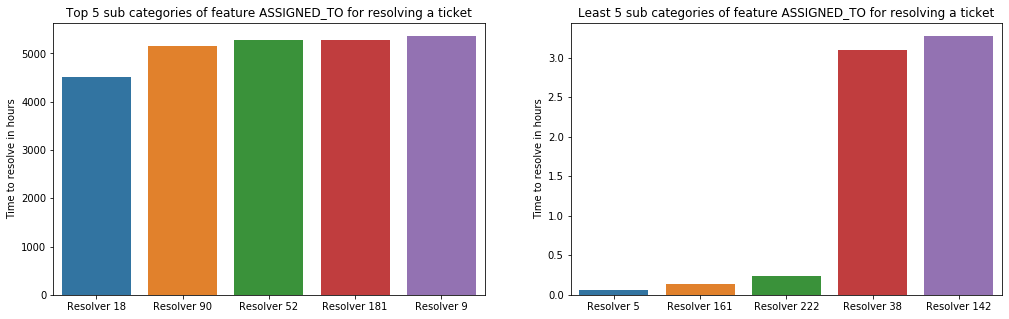

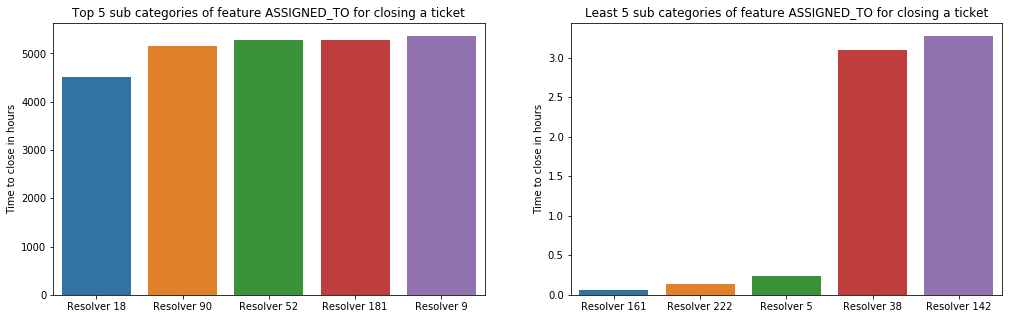

In [139]:
mean_target('assigned_to')

1. Top 4 features are almost taking same time to resolve, close the tickets. 
2. Resolver 9 taking the most time to close, resolve a ticket and Resolver 5 ,161 take the lease time around 10 mins to resolve, close a ticket

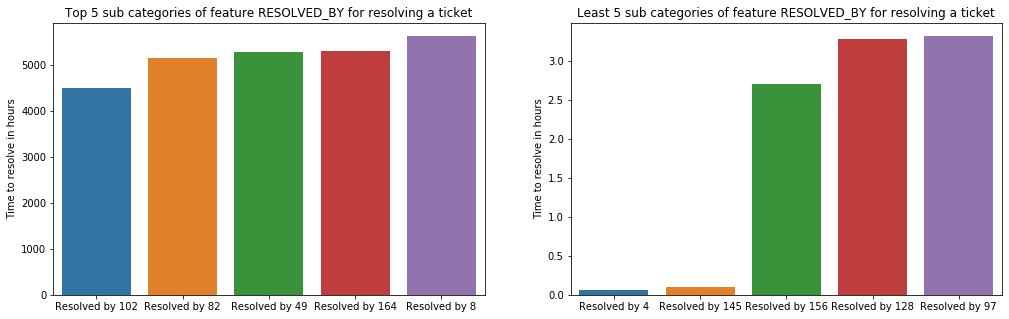

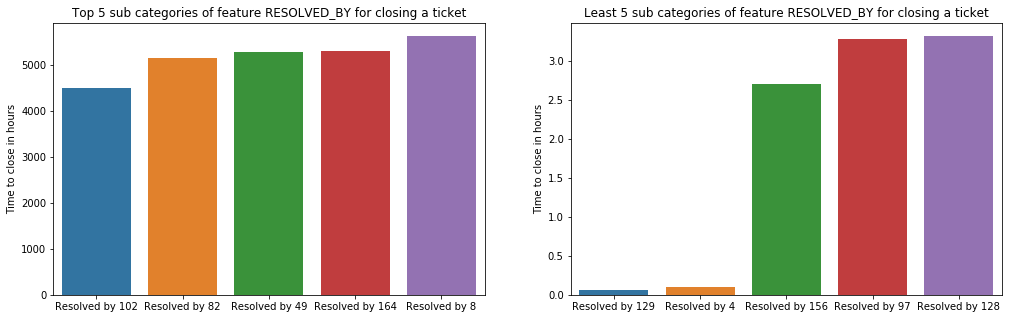

In [140]:
mean_target('resolved_by')

1. Tickets resolved by 8 took the more time and resolved by 4, 129 took less time to resolve and close the tickets

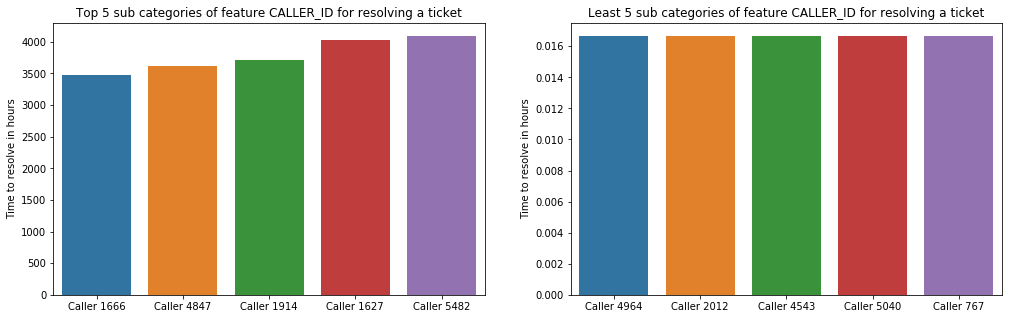

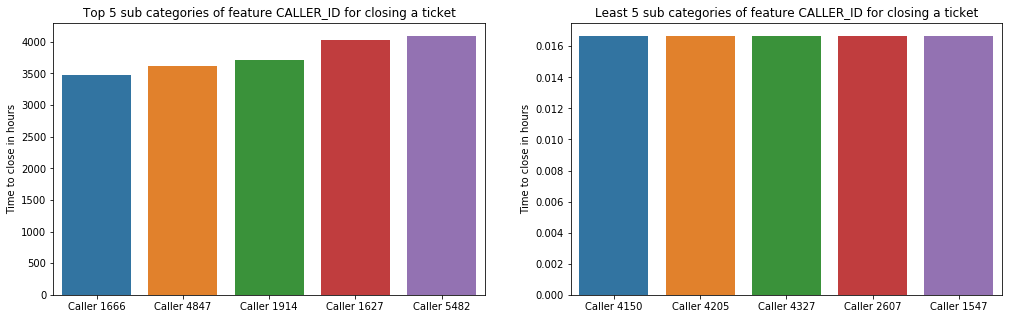

In [143]:
mean_target('caller_id')

1. Tickets reported by caller 5482 took more time to close, resolve a ticket
2. Tickets reported by least 5 time taken caller ids are resolved, closed within a <B>MINUTE</B>

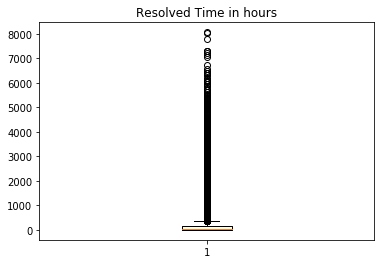

Median time to resolve a ticket       :  29.966666666666665
75 percentile time to resolve a ticket:  146.8
90 percentile time to resolve a ticket:  366.6433333333334
99 percentile time to resolve a ticket:  2829.7886666666664
100 percentile time to resolve a ticket:  8070.166666666667


In [150]:
s=(df1.groupby(['number'])['resolved_time'].mean())/3600
plt.boxplot(s.values)
plt.title('Resolved Time in hours')
plt.show()
print('Median time to resolve a ticket       : ',np.percentile(s.values,50))
print('75 percentile time to resolve a ticket: ',np.percentile(s.values,75))
print('90 percentile time to resolve a ticket: ',np.percentile(s.values,90))
print('99 percentile time to resolve a ticket: ',np.percentile(s.values,99))
print('100 percentile time to resolve a ticket: ',np.percentile(s.values,100))

1. 50 percent of tickets are resolved within close to 30 hours
2. 90 percent of tickets are resolved within 370 hours, close to 15 days 6 hours

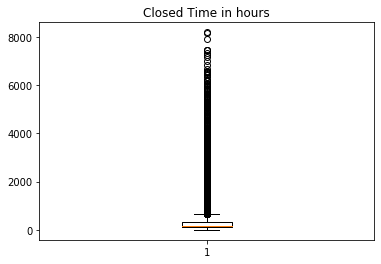

Median time to close a ticket       :  153.91666666666666
75 percentile time to close a ticket:  343.6
90 percentile time to close a ticket:  550.1066666666668
99 percentile time to close a ticket:  2973.8266666666655
100 percentile time to close a ticket:  8190.616666666667


In [151]:
s=(df1.groupby(['number'])['closed_time'].mean())/3600
plt.boxplot(s.values)
plt.title('Closed Time in hours')
plt.show()
print('Median time to close a ticket       : ',np.percentile(s.values,50))
print('75 percentile time to close a ticket: ',np.percentile(s.values,75))
print('90 percentile time to close a ticket: ',np.percentile(s.values,90))
print('99 percentile time to close a ticket: ',np.percentile(s.values,99))
print('100 percentile time to close a ticket: ',np.percentile(s.values,100))

1. 50 percentile tickets are closed within 154 hours, close to 6 days
2. 90 percentile tickets are closed within 550 hours, close to 23 days

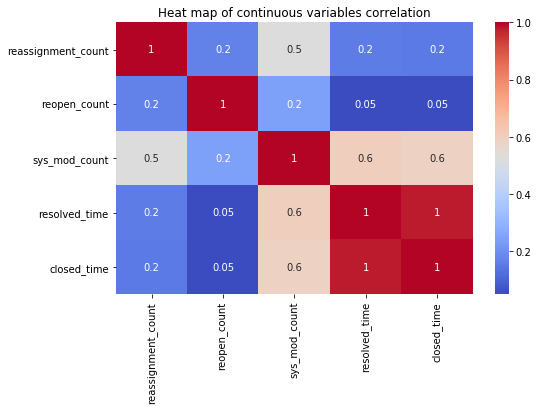

In [174]:
plt.subplots(figsize=(8,5))
plt.title('Heat map of continuous variables correlation')
sns.heatmap(df1[['reassignment_count','reopen_count','sys_mod_count',
                'resolved_time','closed_time']].corr(), annot = True,cmap= 'coolwarm',fmt='.1g')

1. sys_mod_count is 60 % correlated with target variables, it is most correlated feature
1. Feature sys_mod_count is correlated with reassignment_count by 50 % 
2. Target features resolved_time and closed_time are perfectly correlated

In [11]:
# Removing numeric and date features
df2=df1.drop(['number','reassignment_count', 'reopen_count', 'sys_mod_count', 
              'opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at'],axis=1) 

In [13]:
import phik
data_cor=df2.phik_matrix()

interval columns not set, guessing: ['resolved_time', 'closed_time']


C:\Users\Sp_install\Anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable assigned_to is very large: 209. Are you sure this is not an interval variable? Analysis for pairs of variables including assigned_to might be slow.
  warnings.warn(
C:\Users\Sp_install\Anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable caller_id is very large: 4829. Are you sure this is not an interval variable? Analysis for pairs of variables including caller_id might be slow.
  warnings.warn(
C:\Users\Sp_install\Anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable location is very large: 203. Are you sure this is not an interval variable? Analysis for pairs of variables including location might be slow.
  warnings.warn(
C:\Users\Sp_install\Anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable opened_by 

<AxesSubplot:>

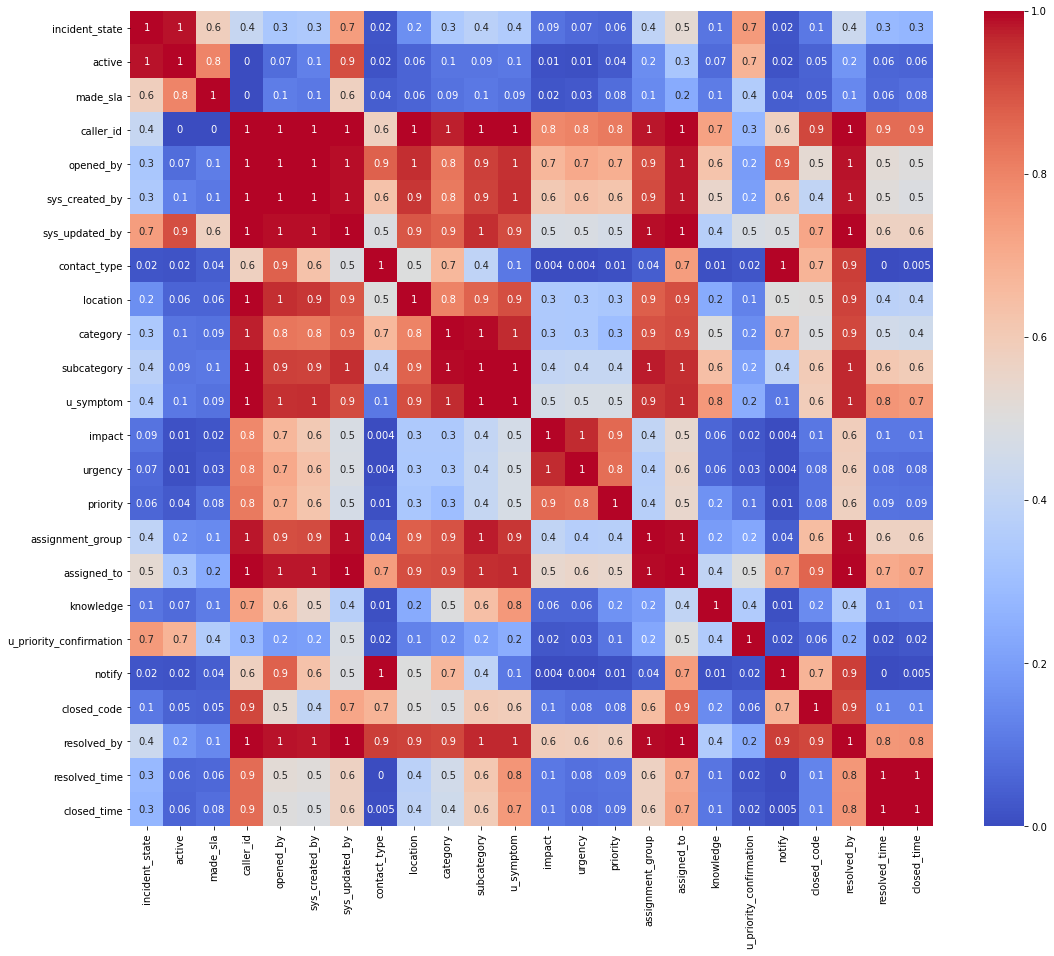

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15))
sns.heatmap(data_cor, annot = True,cmap= 'coolwarm',fmt='.1g')

1. We can see many features are correlated, active and incident state are correlated, we can take incident state as it is more correlated with target variables
2. caller_id is completley correlated with opened_by, sys_created_by, sys_updated_by, location, category, subcategory, u_symptom, assignment_group, assigned_to, resolved_by features, we can keep caller_id and drop rest of the features as it is more correlated with target variables
3. contact_type and notify are correlated to each other and they are completley not correlated to target variables, better to remove these features
4. impact and urgency are completley correlated, we can remove urgency feature

In [130]:
# Dropping the features which are highly correlated
df2=df1.drop(['active','opened_by','sys_created_by','sys_updated_by','location','category',
              'subcategory','u_symptom','assignment_group','assigned_to','resolved_by',
             'contact_type','notify','urgency'],axis=1,inplace=False)

## Hour and Day features

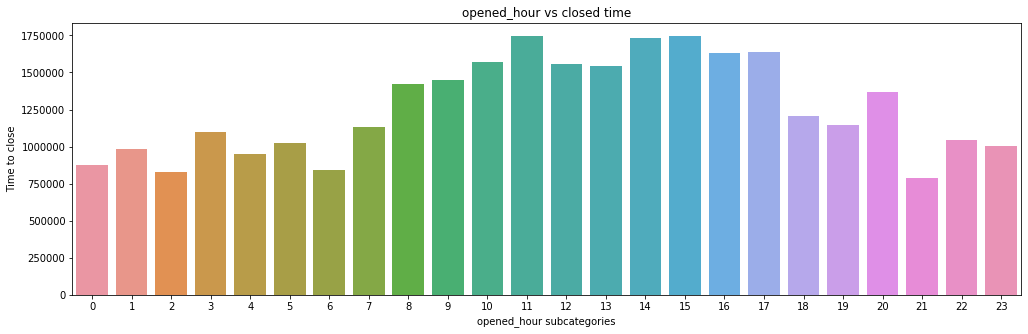

In [161]:
# creating hour feature from opened_at feature
opened_hour=df2.opened_at.apply(lambda x: x.hour)
df2['opened_hour']=opened_hour

plot_target('opened_hour',df1=df2)

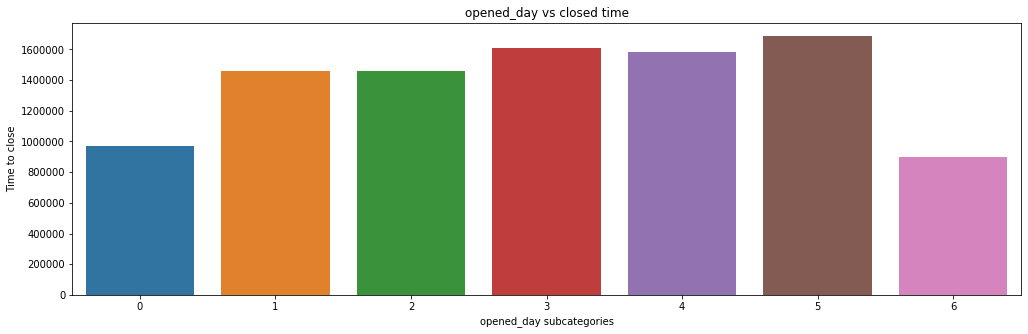

In [162]:
# creating day feature from opened_at feature
opened_day=df2.opened_at.apply(lambda x: x.strftime("%w"))
df2['opened_day']=opened_day.astype(int)

plot_target('opened_day',df1=df2)

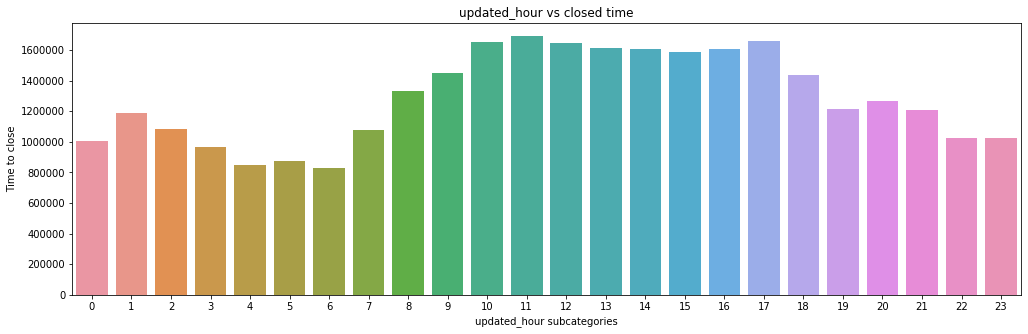

In [160]:
# creating hour feature from sys_updated_at feature
updated_hour=df2.sys_updated_at.apply(lambda x: x.hour)
df2['updated_hour']=updated_hour

plot_target('updated_hour',df1=df2)

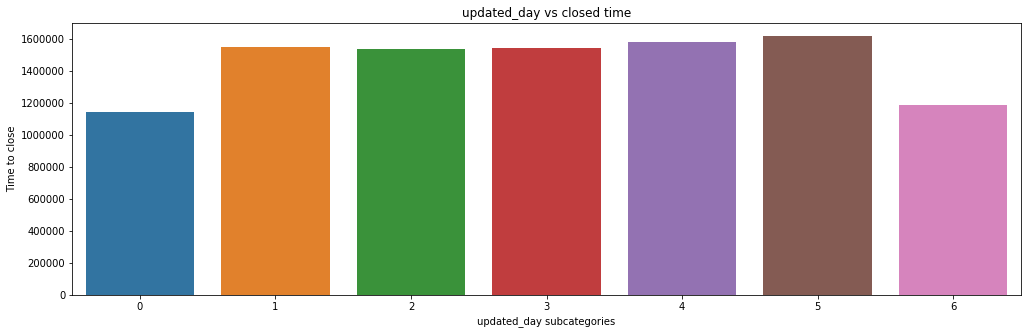

In [159]:
# creating day feature from sys_updated_at feature
updated_day=df2.sys_updated_at.apply(lambda x: x.strftime("%w"))
df2['updated_day']=updated_day.astype(int)

plot_target('updated_day',df1=df2)

1. Incidents opened and updated on peak hours are taking more time to close compared to other hours
2. Incidents opened and updated on Saturday and Sunday are taking less time to close compared to weekdays

# Cyclic features

In [133]:
# creating cyclic featuers sin and cosine 
import numpy as np
df2['opened_hour_sin'] = np.sin(2 * np.pi * df2['opened_hour']/23.0)
df2['opened_hour_cos'] = np.cos(2 * np.pi * df2['opened_hour']/23.0)

df2['opened_day_sin'] = np.sin(2 * np.pi * df2['opened_day']/6)
df2['opened_day_cos'] = np.cos(2 * np.pi * df2['opened_day']/6)

In [139]:
# creating cyclic featuers sin and cosine 
df2['updated_hour_sin'] = np.sin(2 * np.pi * df2['updated_hour']/23.0)
df2['updated_hour_cos'] = np.cos(2 * np.pi * df2['updated_hour']/23.0)

df2['updated_day_sin'] = np.sin(2 * np.pi * df2['updated_day']/6)
df2['updated_day_cos'] = np.cos(2 * np.pi * df2['updated_day']/6)

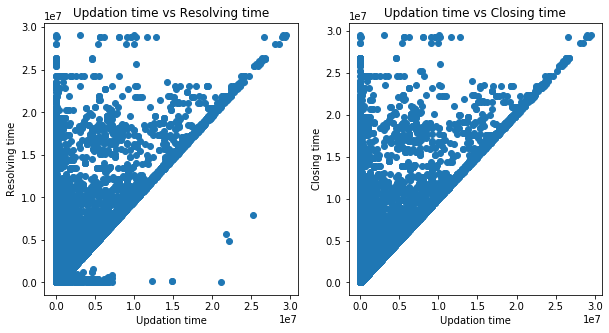

In [142]:
# creating updation time feature by taking difference of sys_updated and opened_at
df2['updation_time']=(df2.sys_updated_at-df2.opened_at).apply(lambda x: x.total_seconds())

plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df2.updation_time,df2.resolved_time)
plt.xlabel('Updation time')
plt.ylabel('Resolving time')
plt.title('Updation time vs Resolving time')

plt.subplot(1,2,2)
plt.scatter(df2.updation_time,df2.closed_time)
plt.xlabel('Updation time')
plt.ylabel('Closing time')
plt.title('Updation time vs Closing time')
plt.show()

In [164]:
from scipy import stats
# Calculating spearman rank correlation between updation time and target variables
coef, p = stats.spearmanr(df2.updation_time, df2.resolved_time)
print('Coefficent for updation vs resolved: ',coef)

coef, p = stats.spearmanr(df2.updation_time, df2.closed_time)
print('Coefficent for updation vs closed: ',coef)

Coefficent for updation vs resolved:  0.4716884129011076
Coefficent for updation vs closed:  0.46156410288673694


1. Target time increases as updation time increases, but there are some deviations in updation time vs resolved time
2. Updation time and target variables are correlated around 45 %

Text(0.5, 1.0, 'Closed Log Time')

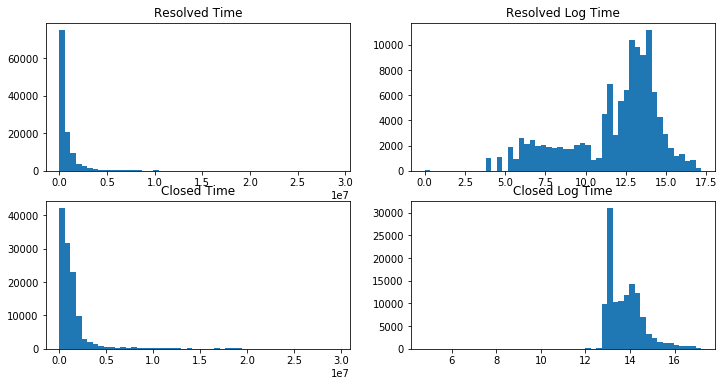

In [166]:
# Our target variables are right skewed, so applying log transformations
plt.subplots(figsize=(12,6))
plt.subplot(2,2,1)
plt.hist(df2.resolved_time,bins=50)
plt.title('Resolved Time')

plt.subplot(2,2,2)
plt.hist(np.log(df2.resolved_time+1),bins=50)
plt.title('Resolved Log Time')

plt.subplot(2,2,3)
plt.hist(df2.closed_time,bins=50)
plt.title('Closed Time')

plt.subplot(2,2,4)
plt.hist(np.log(df2.closed_time+1),bins=50)
plt.title('Closed Log Time')

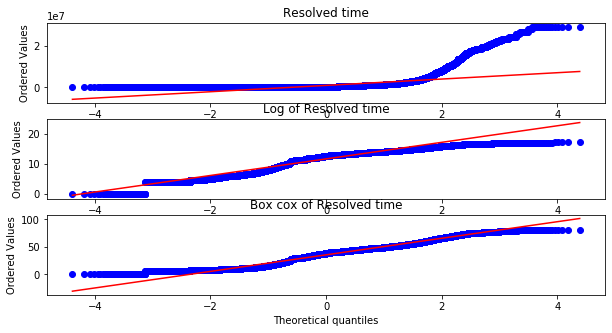

In [167]:
# Using Q-Q plot to see which transformations are close to gaussian
from scipy import stats
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(311)
prob = stats.probplot(df2.resolved_time, dist=stats.norm,plot=ax1)
ax1.set_title('Resolved time')

ax2 = fig.add_subplot(312)
prob = stats.probplot(np.log(df2.resolved_time+1), dist=stats.norm,plot=ax2)
ax2.set_title('Log of Resolved time')

ax3 = fig.add_subplot(313)
xt, _ = stats.boxcox(df2.resolved_time+1)
prob = stats.probplot(xt, dist=stats.norm,plot=ax3)
ax3.set_title('Box cox of Resolved time')

plt.show()

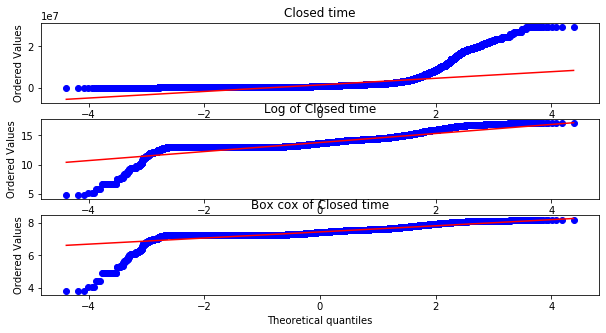

In [169]:
# Using Q-Q plot to see which transformations are close to gaussian

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(311)
prob = stats.probplot(df2.closed_time, dist=stats.norm,plot=ax1)
ax1.set_title('Closed time')

ax2 = fig.add_subplot(312)
prob = stats.probplot(np.log(df2.closed_time+1), dist=stats.norm,plot=ax2)
ax2.set_title('Log of Closed time')

ax3 = fig.add_subplot(313)
xt, _ = stats.boxcox(df2.closed_time+1)
prob = stats.probplot(xt, dist=stats.norm,plot=ax3)
ax3.set_title('Box cox of Closed time')

plt.show()

1. Target variables are right skewed, after applying log or box cox transformations they are less skewed than before
2. Log or box transformation makes a similar change in the feature, we can opt for log feature

In [170]:
#Applying log+1 to the target variables, when predicting we need to do exp(x)-1
resolved_time_log=np.log(df2.resolved_time+1)
df2['resolved_time_log']=resolved_time_log

closed_time_log=np.log(df2.closed_time+1)
df2['closed_time_log']=closed_time_log

# Summary of EDA 
1. There are 20769 unique tickets and 119998 logs indicating different events of the tickets
2. There are 3 numeric, 4 boolean, 5 date-time features and rest are categorical features.
3. Features problem_id, rfc, vendor, caused_by, cmdb_ci are having missing values more than 98%, removed them as they are not useful
4. There are missing values in target feature resolved_at, filled that with median difference of closed_at and resolved_at as they are highly correlated
5. Features like caller_id, sys_updated_by, opened_by are having id's as values, we have considered each of them as a subcategory, and considered null values with a seperate category missing.
6. Top 10-15 percent of the subcategories are covering the most data points in most of the categorical features
7. There are potential outliers in the continuous features, we have not removed them because they are rare points
8. Tickets reported by least 5 time taken caller ids are resolved, closed within a MINUTE
8. 50 percentile of tickets are resolved witin 1.25 days and closed within 6 days
9. sys_mod_count is 60% correlated with target variables, it is the most correlated numeric feature with target variables in the data set.
10. caller_id is correlated with many other features, we have removed them and it is most correlated categorical feature.
11. From the univariate analysis, we get that in high cardinal features 10-20 % categories are taking more time and rest are taking a decent time.
12. We have created new features opened_day, opened_hour from opened_at and sys_updated_day, sys_updated_hour and observed the week days, peak-hours 10-5 are taking more time than others
14. Created new feature updation_time by taking difference of sys_updation_at and opened_at, by which we are able to see how much time takes to update an incident and this feature is slighlty correalted with feature variables
15. Our target variables are right skewed, applied log and box transformations to make them gaussian, both the transformations are not gaussian when plotted with QQ plots, but target variables are not scaled,
so log transormations may work well as they are right skewed, we can also use boxcox both are yeilding same results.


In [213]:
import joblib
joblib.dump(df2,'data_df2.pkl')

['data_df2.pkl']

In [214]:
df2.columns

Index(['number', 'incident_state', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'caller_id', 'opened_at', 'sys_created_at',
       'sys_updated_at', 'impact', 'priority', 'knowledge',
       'u_priority_confirmation', 'closed_code', 'resolved_at', 'closed_at',
       'resolved_time', 'closed_time', 'opened_hour', 'opened_hour_sin',
       'opened_hour_cos', 'opened_day', 'opened_day_sin', 'opened_day_cos',
       'updated_hour', 'updated_day', 'updated_hour_sin', 'updated_hour_cos',
       'updated_day_sin', 'updated_day_cos', 'updation_time',
       'resolved_time_log', 'closed_time_log'],
      dtype='object')